### 9.5 sklearn 中使用高斯核函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/xu/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/xu/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


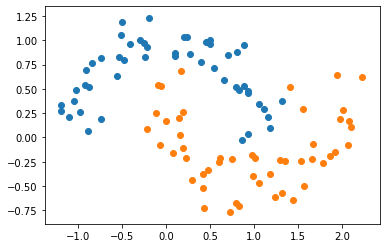

In [2]:
from sklearn import datasets

X,y = datasets.make_moons(noise=0.15,random_state=666)

plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline
#使用核函数建立 SVC
def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ('std_scaler',StandardScaler()),
        ('svc',SVC(kernel='rbf',gamma=gamma))
    ])

In [6]:
svc = RBFKernelSVC(gamma=1.0)
svc.fit(X,y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=1.0,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [7]:
# 绘制决策边界
#绘制决策边界
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/home/xu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


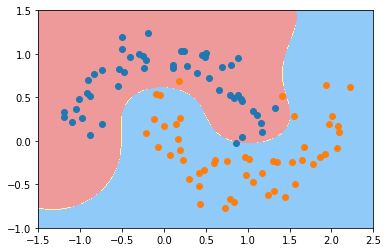

In [9]:
plot_decision_boundary(svc, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

/home/xu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


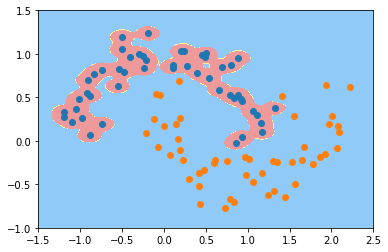

In [10]:
svc_gamma100 = RBFKernelSVC(gamma=100)
svc_gamma100.fit(X,y)
plot_decision_boundary(svc_gamma100, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 高斯函数和高斯核函数的区别

高斯核函数 gamma 越大，代表正态分布中的标准差越小，标准差小了代表数据都集中在一个地方，正太分布那个山会更瘦，对应的是正太分图像中间的那个尖儿，也就是粉色的部分